## **Bollinger Bands indicator and backtesting**
---
Conditions:
*   https://www.investopedia.com/terms/b/bollingerbands.asp
*   Middle band - SMA 20 days
*   Upper band - SMA + 2*std of Close price
*   Lower band - SMA - 2*std of Close price 

### 1. Libraries

In [2]:
#Import the libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Download the data from yahoofinance or CSV file

In [27]:
# a) Load the data from csv file
#from google.colab import files
#files.upload()

In [31]:
# b) Load the data from yahoofinance
df = yf.download("MSFT", start="2020-01-01")
#Set the data as the index
df.index.name = None
df['Date'] = df.index
#Show the data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
2019-12-31,156.770004,157.770004,156.449997,157.699997,154.749741,18369400,2019-12-31
2020-01-02,158.779999,160.729996,158.330002,160.619995,157.615128,22622100,2020-01-02
2020-01-03,158.320007,159.949997,158.059998,158.619995,155.652542,21116200,2020-01-03
2020-01-06,157.080002,159.100006,156.509995,159.029999,156.054855,20813700,2020-01-06
2020-01-07,159.320007,159.669998,157.320007,157.580002,154.631989,21634100,2020-01-07


### 3. Bollinger Bands

In [32]:
#SMA for 20 days
df['SMA'] = df.Close.rolling(window=20).mean()
#Standard deviation
df['stddev'] = df.Close.rolling(window=20).std()
#Upper and Lower band
df['Upper'] = df.SMA + 2*df.stddev
df['Lower'] = df.SMA - 2*df.stddev
#Buy and Sell signals
df['Buy_Signal'] = np.where(df.Lower > df.Close, True, False)
df['Sell_Signal'] = np.where(df.Upper < df.Close, True, False)
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date,SMA,stddev,Upper,Lower,Buy_Signal,Sell_Signal
2020-01-29,167.839996,168.750000,165.690002,168.039993,164.896286,34754500,2020-01-29,162.933498,3.302931,169.539361,156.327636,False,False
2020-01-30,174.050003,174.050003,170.789993,172.779999,169.547623,51597500,2020-01-30,163.687498,3.737938,171.163375,156.211622,False,True
2020-01-31,172.210007,172.399994,169.580002,170.229996,167.045319,36142700,2020-01-31,164.167999,3.935323,172.038644,156.297353,False,False
2020-02-03,170.429993,174.500000,170.399994,174.380005,171.117706,30107000,2020-02-03,164.955999,4.324559,173.605117,156.306881,False,True
2020-02-04,177.139999,180.639999,176.309998,180.119995,176.750305,36433300,2020-02-04,166.010499,5.271194,176.552887,155.468110,False,True


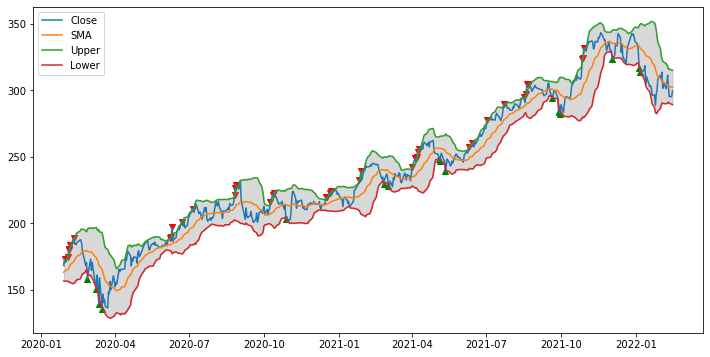

In [33]:
#Visually show and plot the close price
plt.figure(figsize=(12,6))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.scatter(df.index[df.Buy_Signal], df[df.Buy_Signal].Close, marker='^', color='g')
plt.scatter(df.index[df.Sell_Signal], df[df.Sell_Signal].Close, marker='v', color='r')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])
plt.show()

In [34]:
#In case of many buys or sells signal in the row, for example 2 times buy, the second and each another has to be ignored. 
buys = []
sells = []
open_pos = False

for i in range(len(df)):
  if df.Lower[i] > df.Close[i]:
    if open_pos == False:
      buys.append(i)
      open_pos = True
  elif df.Upper[i] < df.Close[i]:
    if open_pos:
      sells.append(i)
      open_pos = False

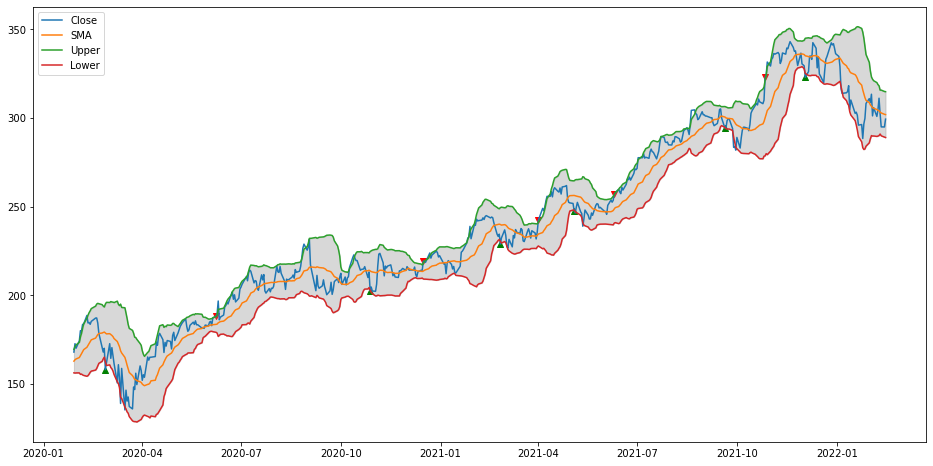

In [35]:
#Visually show and plot the close price
plt.figure(figsize=(16,8))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.scatter(df.iloc[buys].index, df.iloc[buys].Close, marker='^', color='g')
plt.scatter(df.iloc[sells].index, df.iloc[sells].Close, marker='v', color='r')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])
plt.show()

In [36]:
#A table with buy and sell signals
merged = pd.concat([df.iloc[buys].Close, df.iloc[sells].Close], axis=1)
merged.columns = ['Buys', 'Sells']
merged

,Buys,Sells
2020-02-27,158.179993,NaN
2020-06-08,NaN,188.360001
2020-10-28,202.679993,NaN
2020-12-16,NaN,219.279999
2021-02-25,228.990005,NaN
2021-04-01,NaN,242.350006
2021-05-04,247.789993,NaN
2021-06-10,NaN,257.239990
2021-09-20,294.299988,NaN
2021-10-27,NaN,323.170013


In [38]:
#Calculate the total and real profit
totalprofit = merged.shift(-1).Sells - merged.Buys # [$]
relprofit = ((merged.shift(-1).Sells - merged.Buys)/merged.Buys) * 100 # [%]
# Average real profit on one trade [%]
relprofit.mean()

9.345508944508595